In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df = pd.read_csv('KNN_Project_Data')

In [66]:
df

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1


LinAlgError: singular matrix

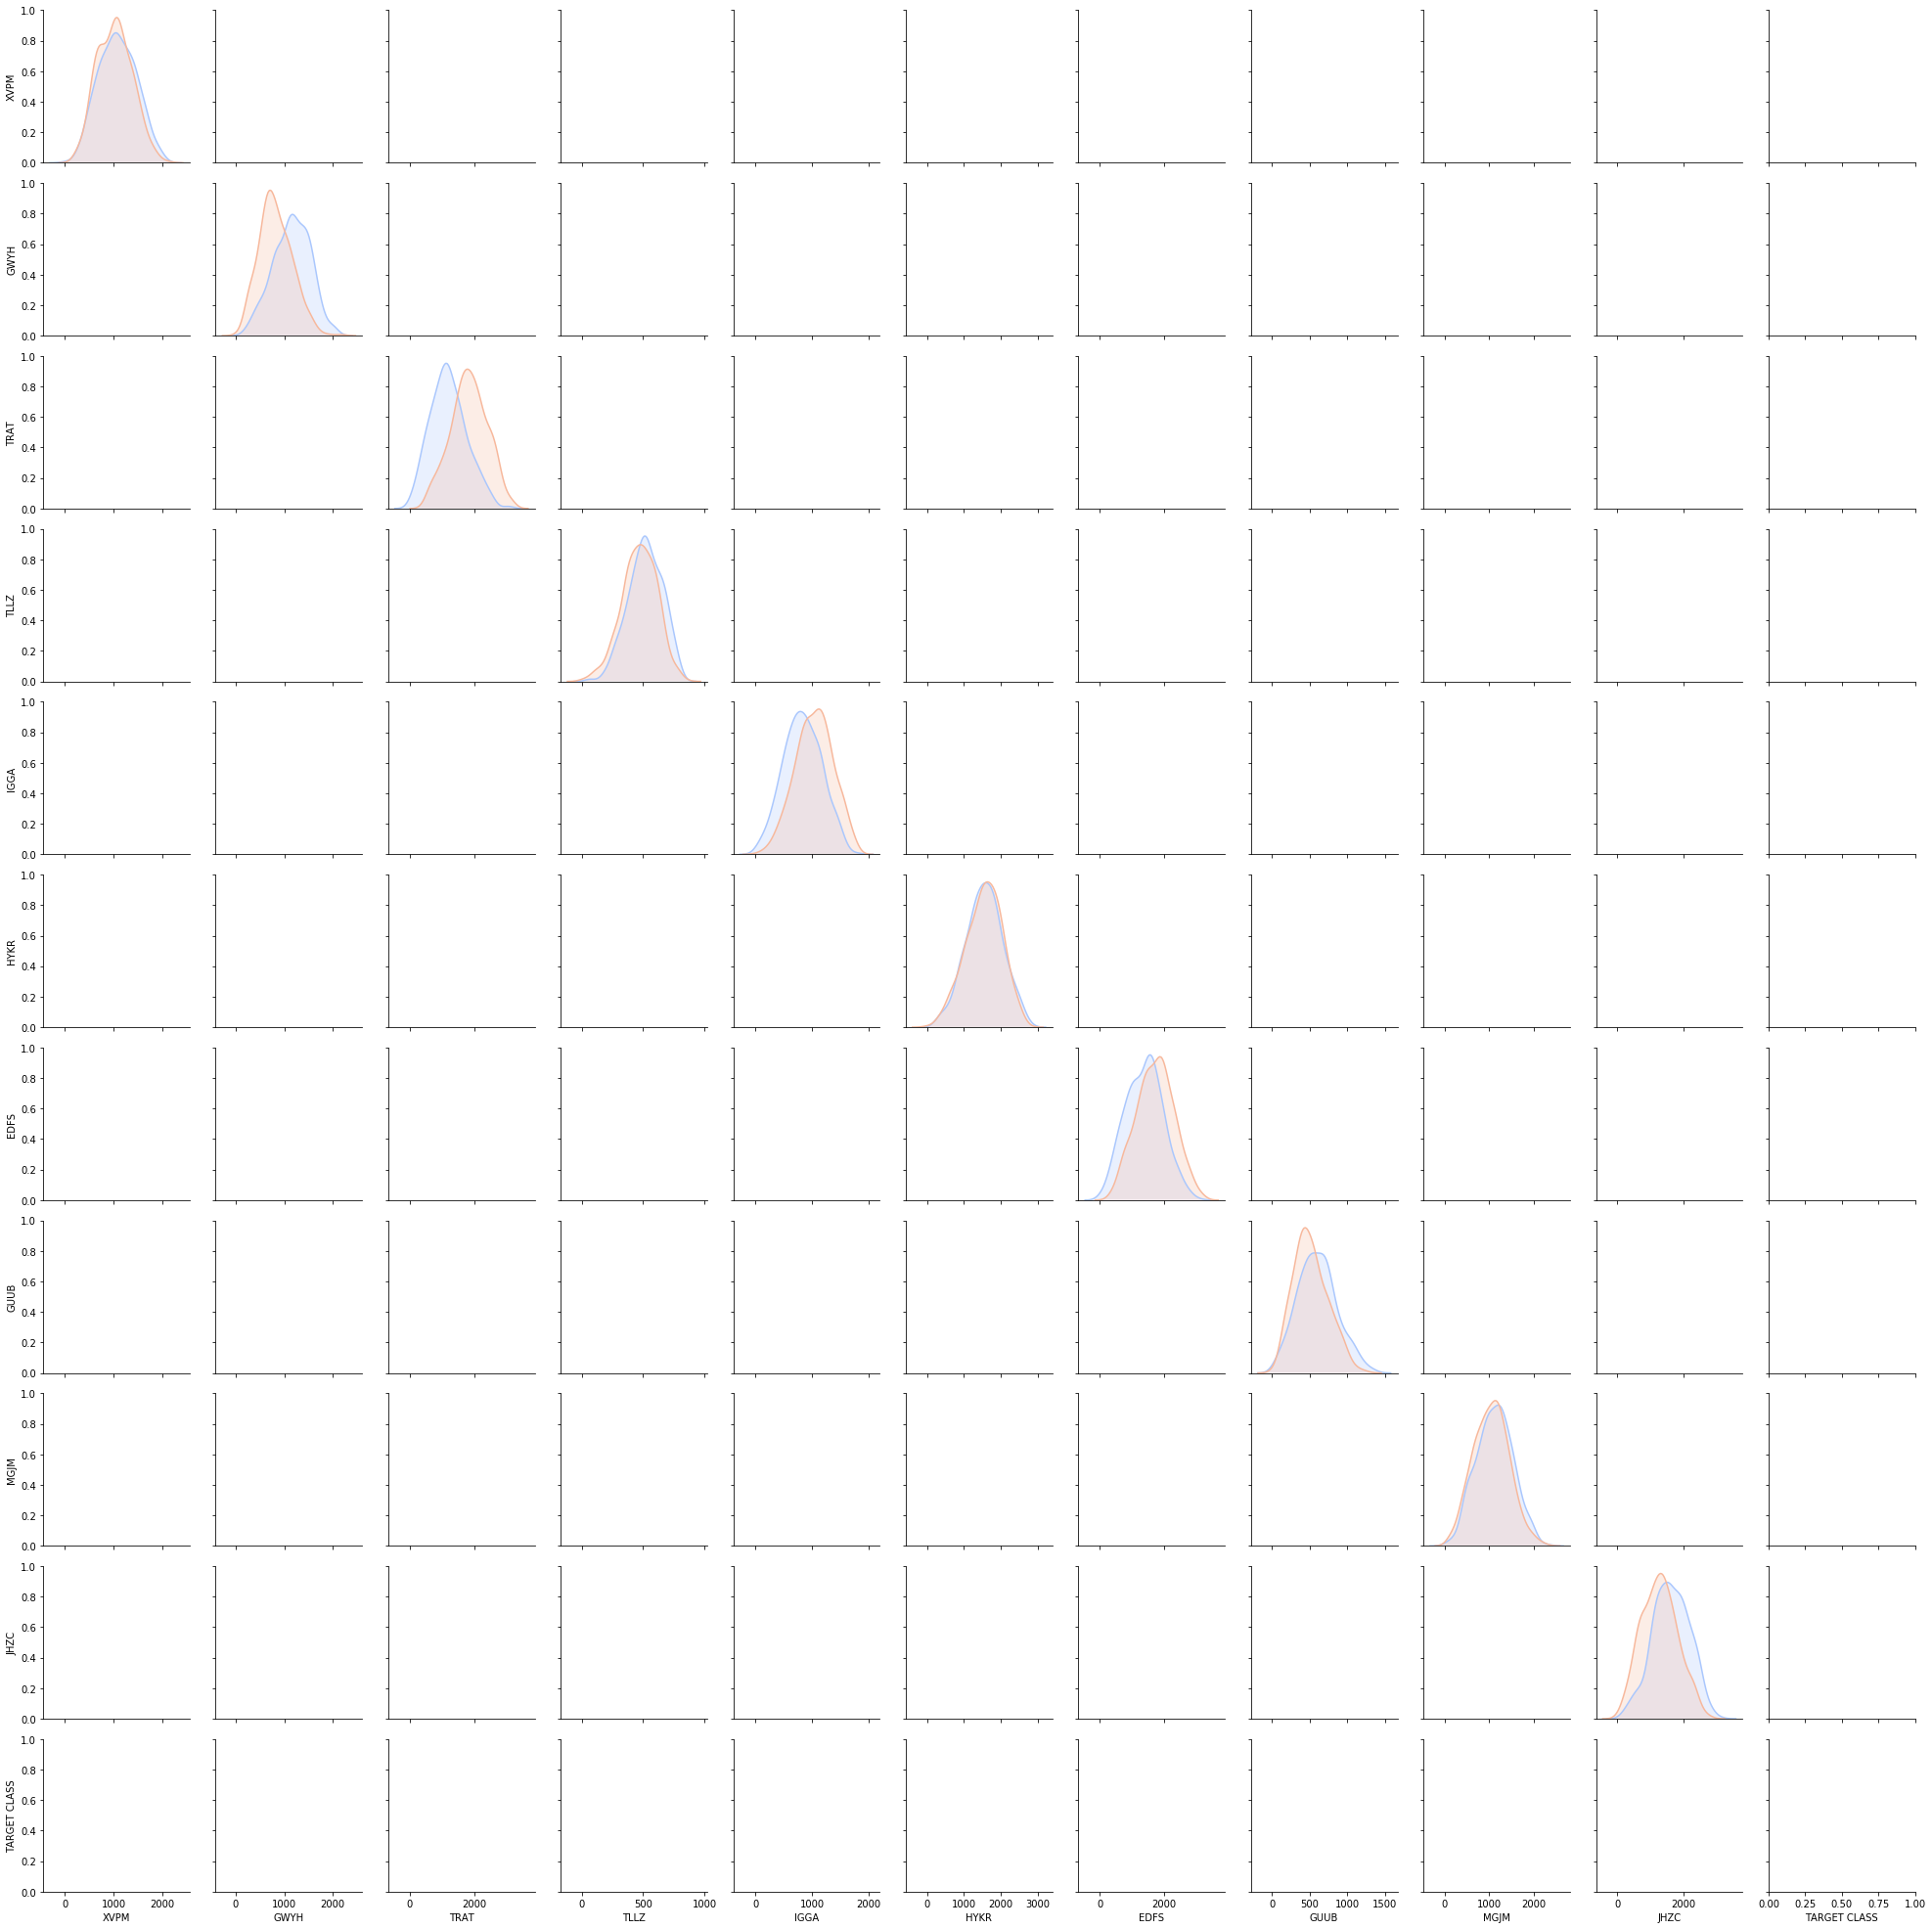

In [67]:
#EDA
sns.pairplot(df, hue='TARGET CLASS', palette='coolwarm')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

In [ ]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [ ]:
#convert the scaled feature to the dataframe
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [ ]:
#now data seems to be standardized and we can split it into train and test
df_feat.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [68]:
X= df_feat
y= df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
#let's set the neighbor as 1 and test the confidence using the classificaton report
knn = KNeighborsClassifier(n_neighbors=1)

In [71]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [72]:
predictions = knn.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[109  43]
 [ 41 107]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [75]:
#let's create a set of error_rate based on k different k values
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

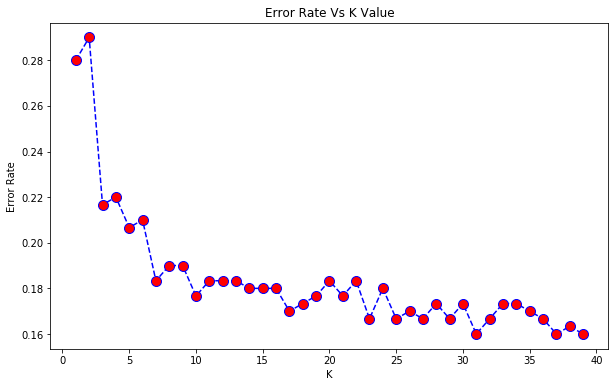

In [77]:
#plot into graph the error rates
plt.figure(figsize=(10, 6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [78]:
#let's see the measure at k=31 and k=37 , it is same
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
pred_31 = knn.predict(X_test)
print(confusion_matrix(y_test, pred_31))
print(classification_report(y_test, pred_31))

[[123  29]
 [ 19 129]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [81]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train, y_train)
pred_32 = knn.predict(X_test)
print(confusion_matrix(y_test, pred_32))
print(classification_report(y_test, pred_32))

[[124  28]
 [ 22 126]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       152
           1       0.82      0.85      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [ ]:
#so, k=31 is better confidence value for prediction
